# Convergence Tests

In [2]:
using Plots, Measures, Printf
theme(:wong2)
using Interpolations
using LaTeXStrings
include("../Utils/misc-tsv.jl")

Main.MiscTSV

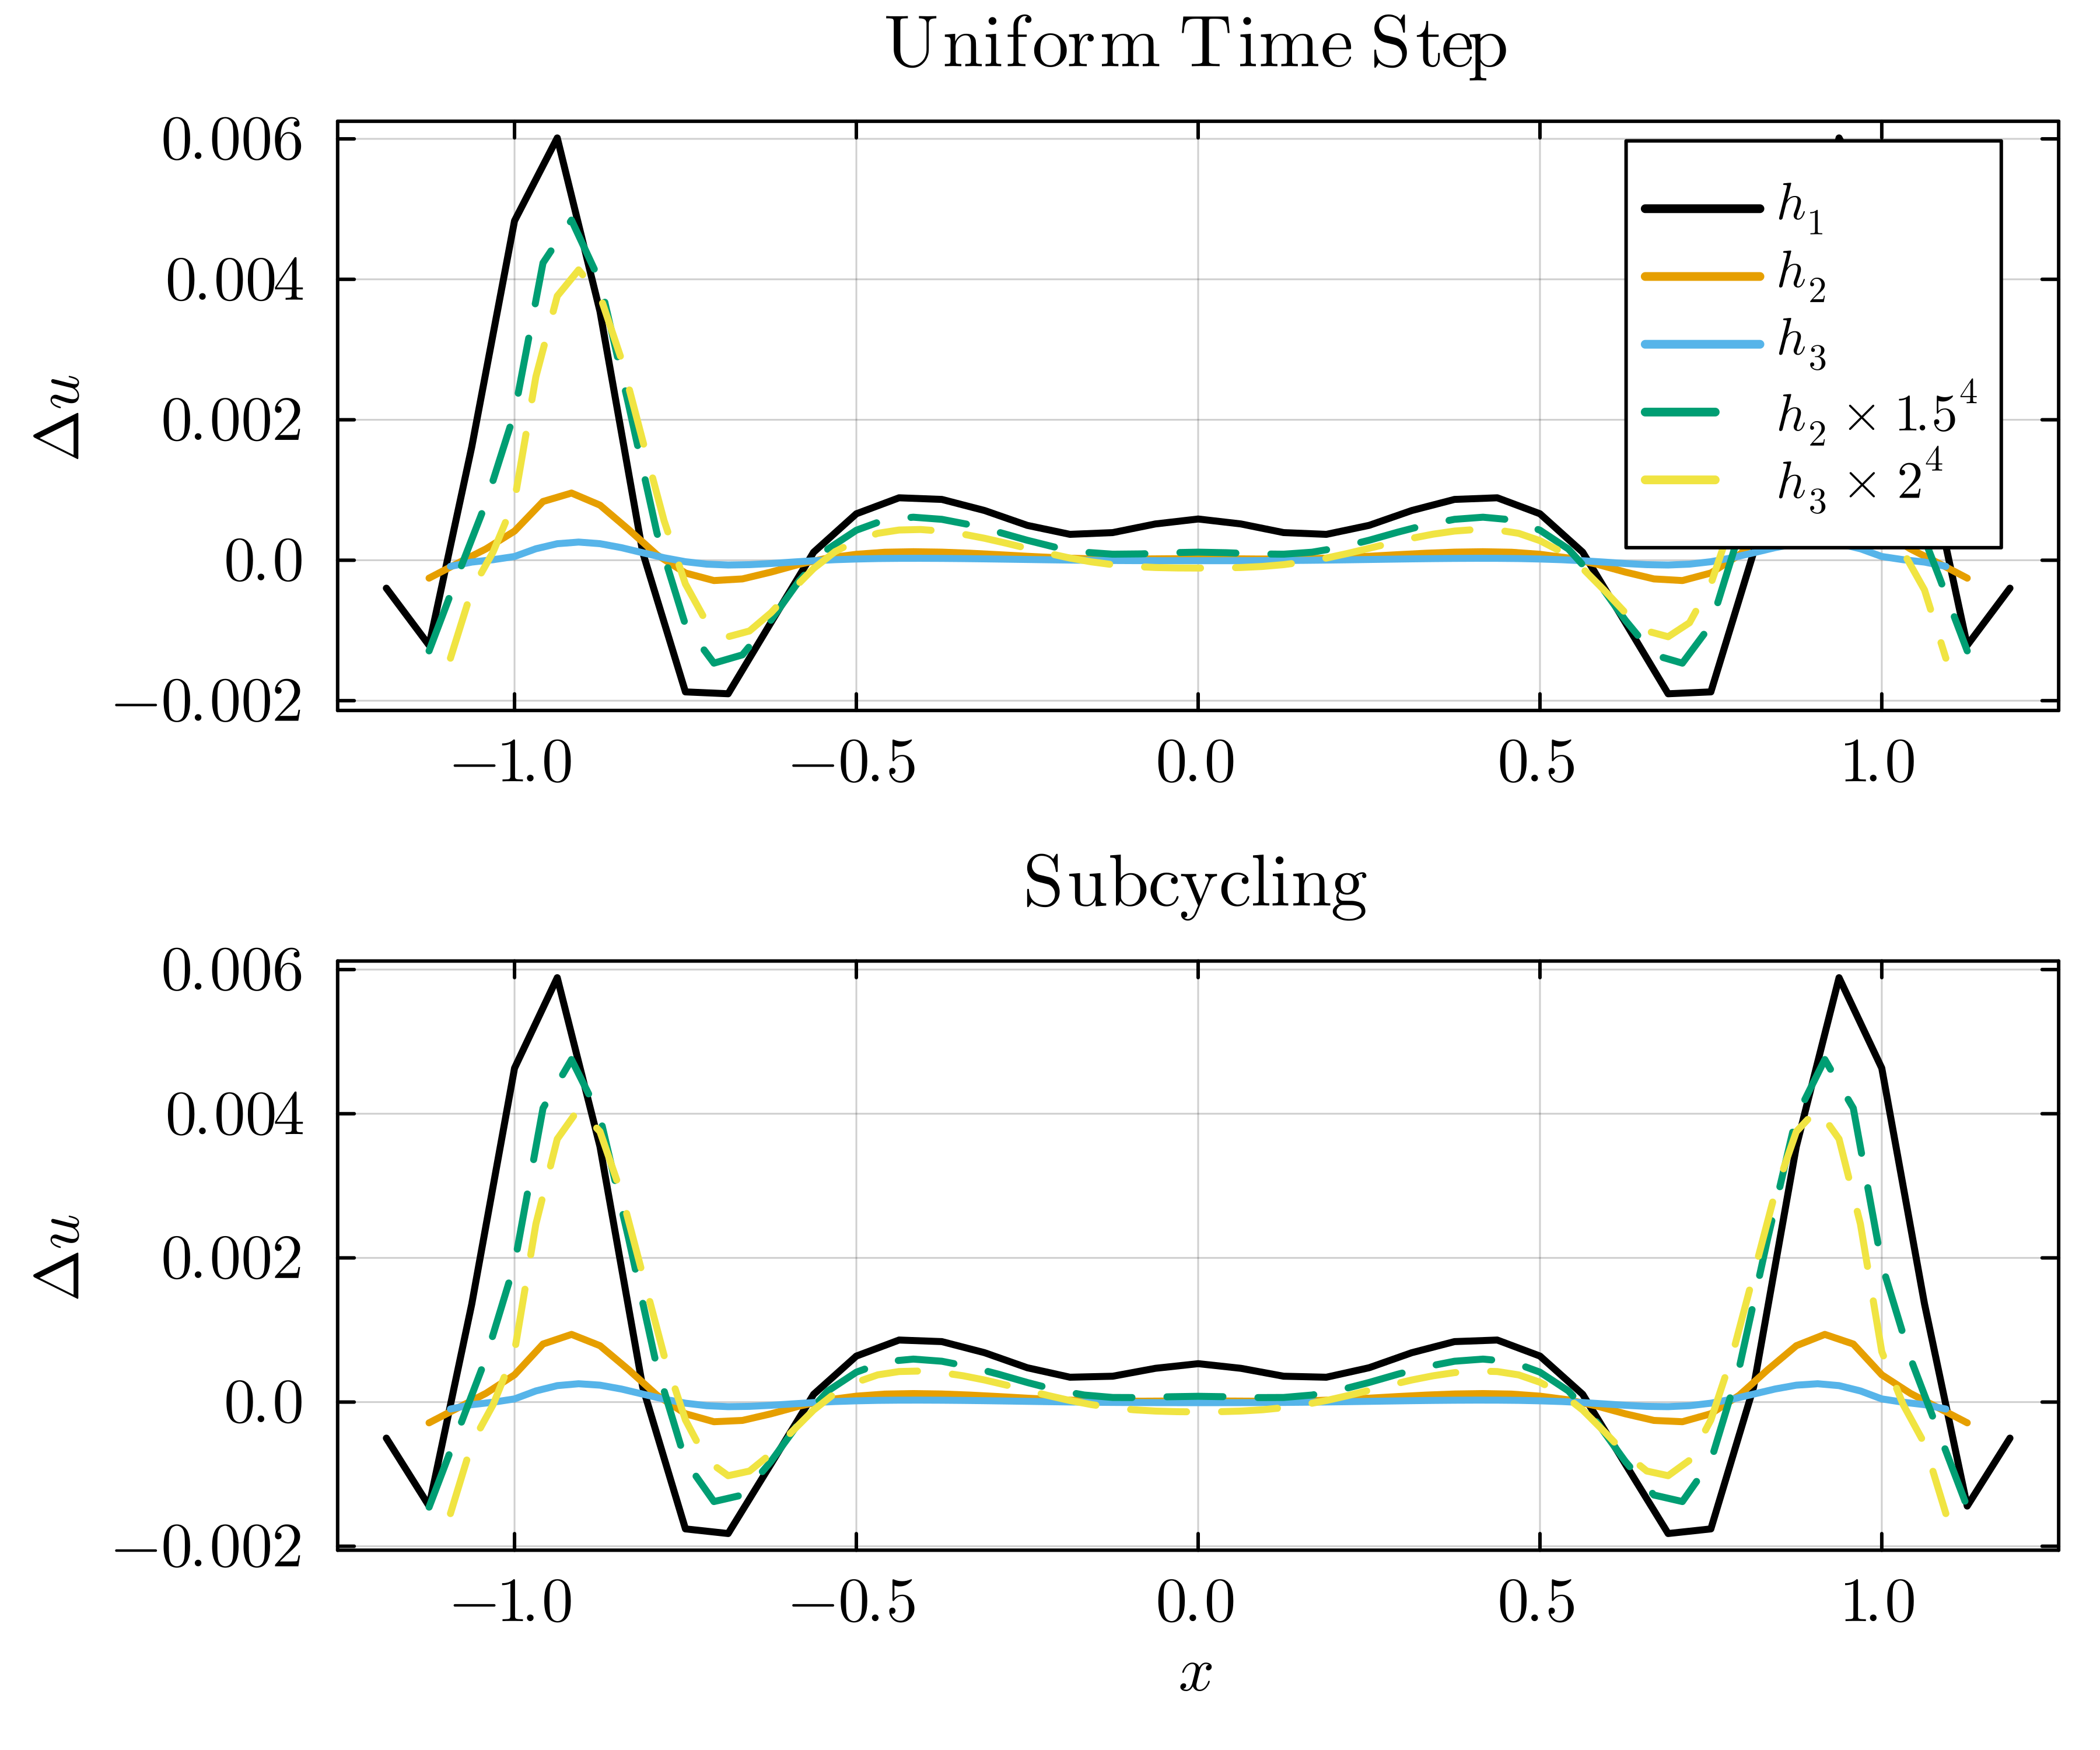

In [7]:
conv_order = 4
conv_bases = [1, 1.5, 2]
plts = []
let l=1, t=1.0, dirss,
    dirss = [
        [
            ("gaussian-noSC_64/output-0000/gaussian-noSC_64/", "low"),
            ("gaussian-noSC_96/output-0000/gaussian-noSC_96/", "med"),
            ("gaussian-noSC_128/output-0000/gaussian-noSC_128/", "high"),
        ],
        [
            ("gaussian_64/output-0000/gaussian_64/", "low"),
            ("gaussian_96/output-0000/gaussian_96/", "med"),
            ("gaussian_128/output-0000/gaussian_128/", "high"),
        ],
    ]
    for (j, dirs) in enumerate(dirss)
        (dats, _) = MiscTSV.load_data_1d(dirs, t;
                                         parent_dir="../../data/ScalarWave/3levels",
                                         prefix="testsubcyclingmc2-error",
                                         level=l, ngh=0)
        labs = [L"h_1", L"h_2", L"h_3"]
        plt = plot()
        xs = [-1.0, -0.5, 0.0, 0.5, 1.0]
        xticks!(plt, xs, [L"%$(n)" for n in xs])
        ys = [-0.002, 0.000, 0.002, 0.004, 0.006]
        yticks!(plt, ys, [L"%$(n)" for n in ys])
        for (i, dat) in enumerate(dats)
            lab = (j == 1) ? labs[i] : ""
            plt = plot!(dat[1], dat[2], linewidth=2, framestyle=:box, label=lab, ylabel=L"\Delta u")
        end
        scalelabs = [L"h_2\times 1.5^4", L"h_3\times 2^4"]
        for (i, dat) in enumerate(dats[2:3])
            lab = (j == 1) ? scalelabs[i] : ""
            plt = plot!(dat[1], dat[2] * (conv_bases[i+1]^conv_order),
                        titlefontsize=14,
                        guidefontsize=12,
                        tickfontsize=12,
                        legendfontsize=10,
                        linewidth=2, linestyle=:dash, label=lab)
        end
        plt = (j==1) ? plot!(title=L"\mathrm{Uniform\,\, Time\,\, Step}") : plot!(title=L"\mathrm{Subcycling}", xlabel=L"x")
        push!(plts, plt)
    end
end
plot_grid = plot(plts..., layout=(2,1), size=(600, 500), dpi=600)
# savefig(plot_grid, "ScalarWave-errors.pdf")
display(plot_grid)